# PyGMT

Pygmt is a phenomenal and easy-to-use tool for making high-quality maps in Python. It is a Python Interface for GMT (C-based program), which allows to easily generate maps with a Python-friendly syntax.


Documentation:

https://www.pygmt.org/latest/


It is not the only way to generate maps in Python. Matplotlib (which we've seen earlier) + Cartopy is also popular, but PyGMT makes many tasks that would be otherwise difficult simple, despite its sometimes arcane syntax. As of v0.8.0 it is fully integrated with geopandas, which makes working with shapefiles super simple.



In [1]:
%%capture
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -q pygmt=0.11

In [1]:
# imports
import pygmt #import pygmt
import pandas as pd #import pandas and give it the nickname "pd", the one that will be used in the code
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pygmt.__version__

'v0.11.0'

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Anatomy of a PyGMT Figure:

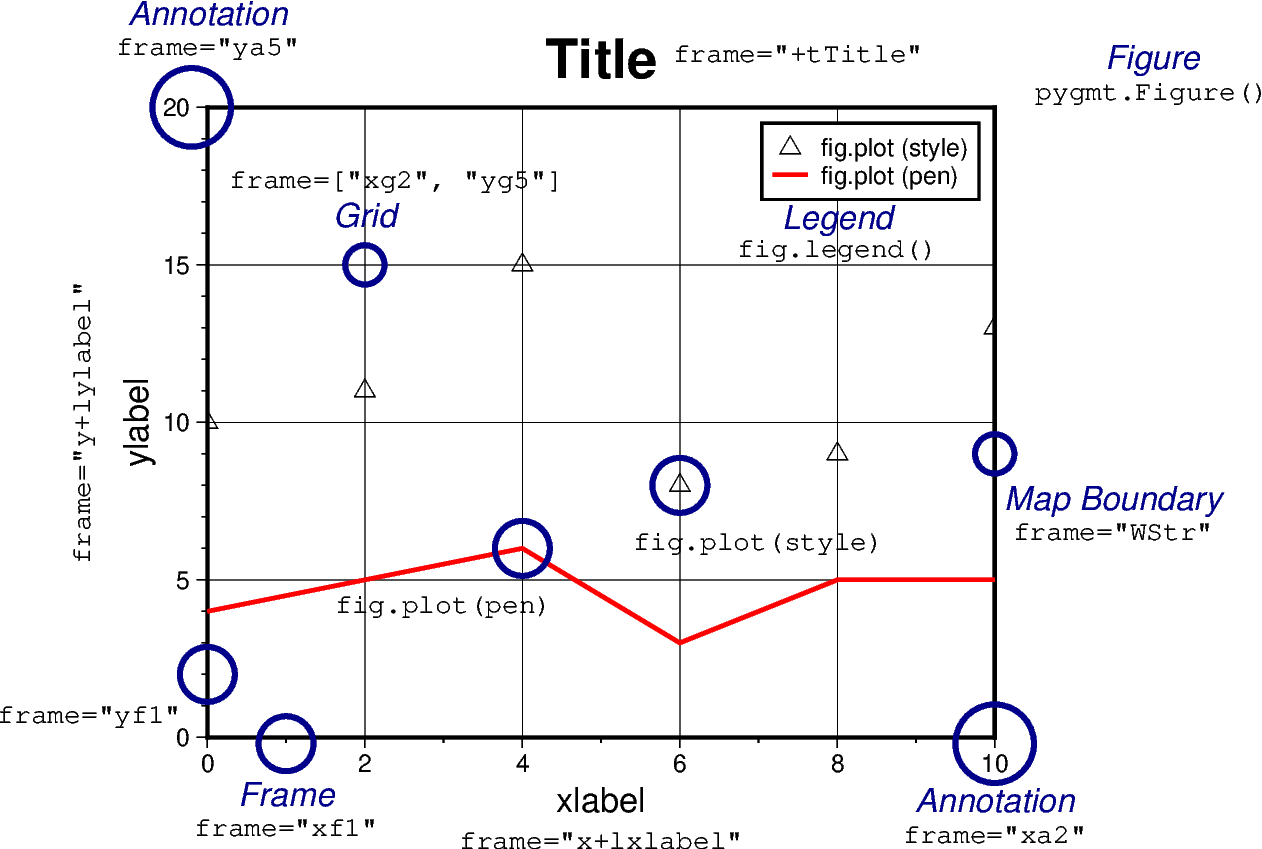

# Plotting with PyGMT

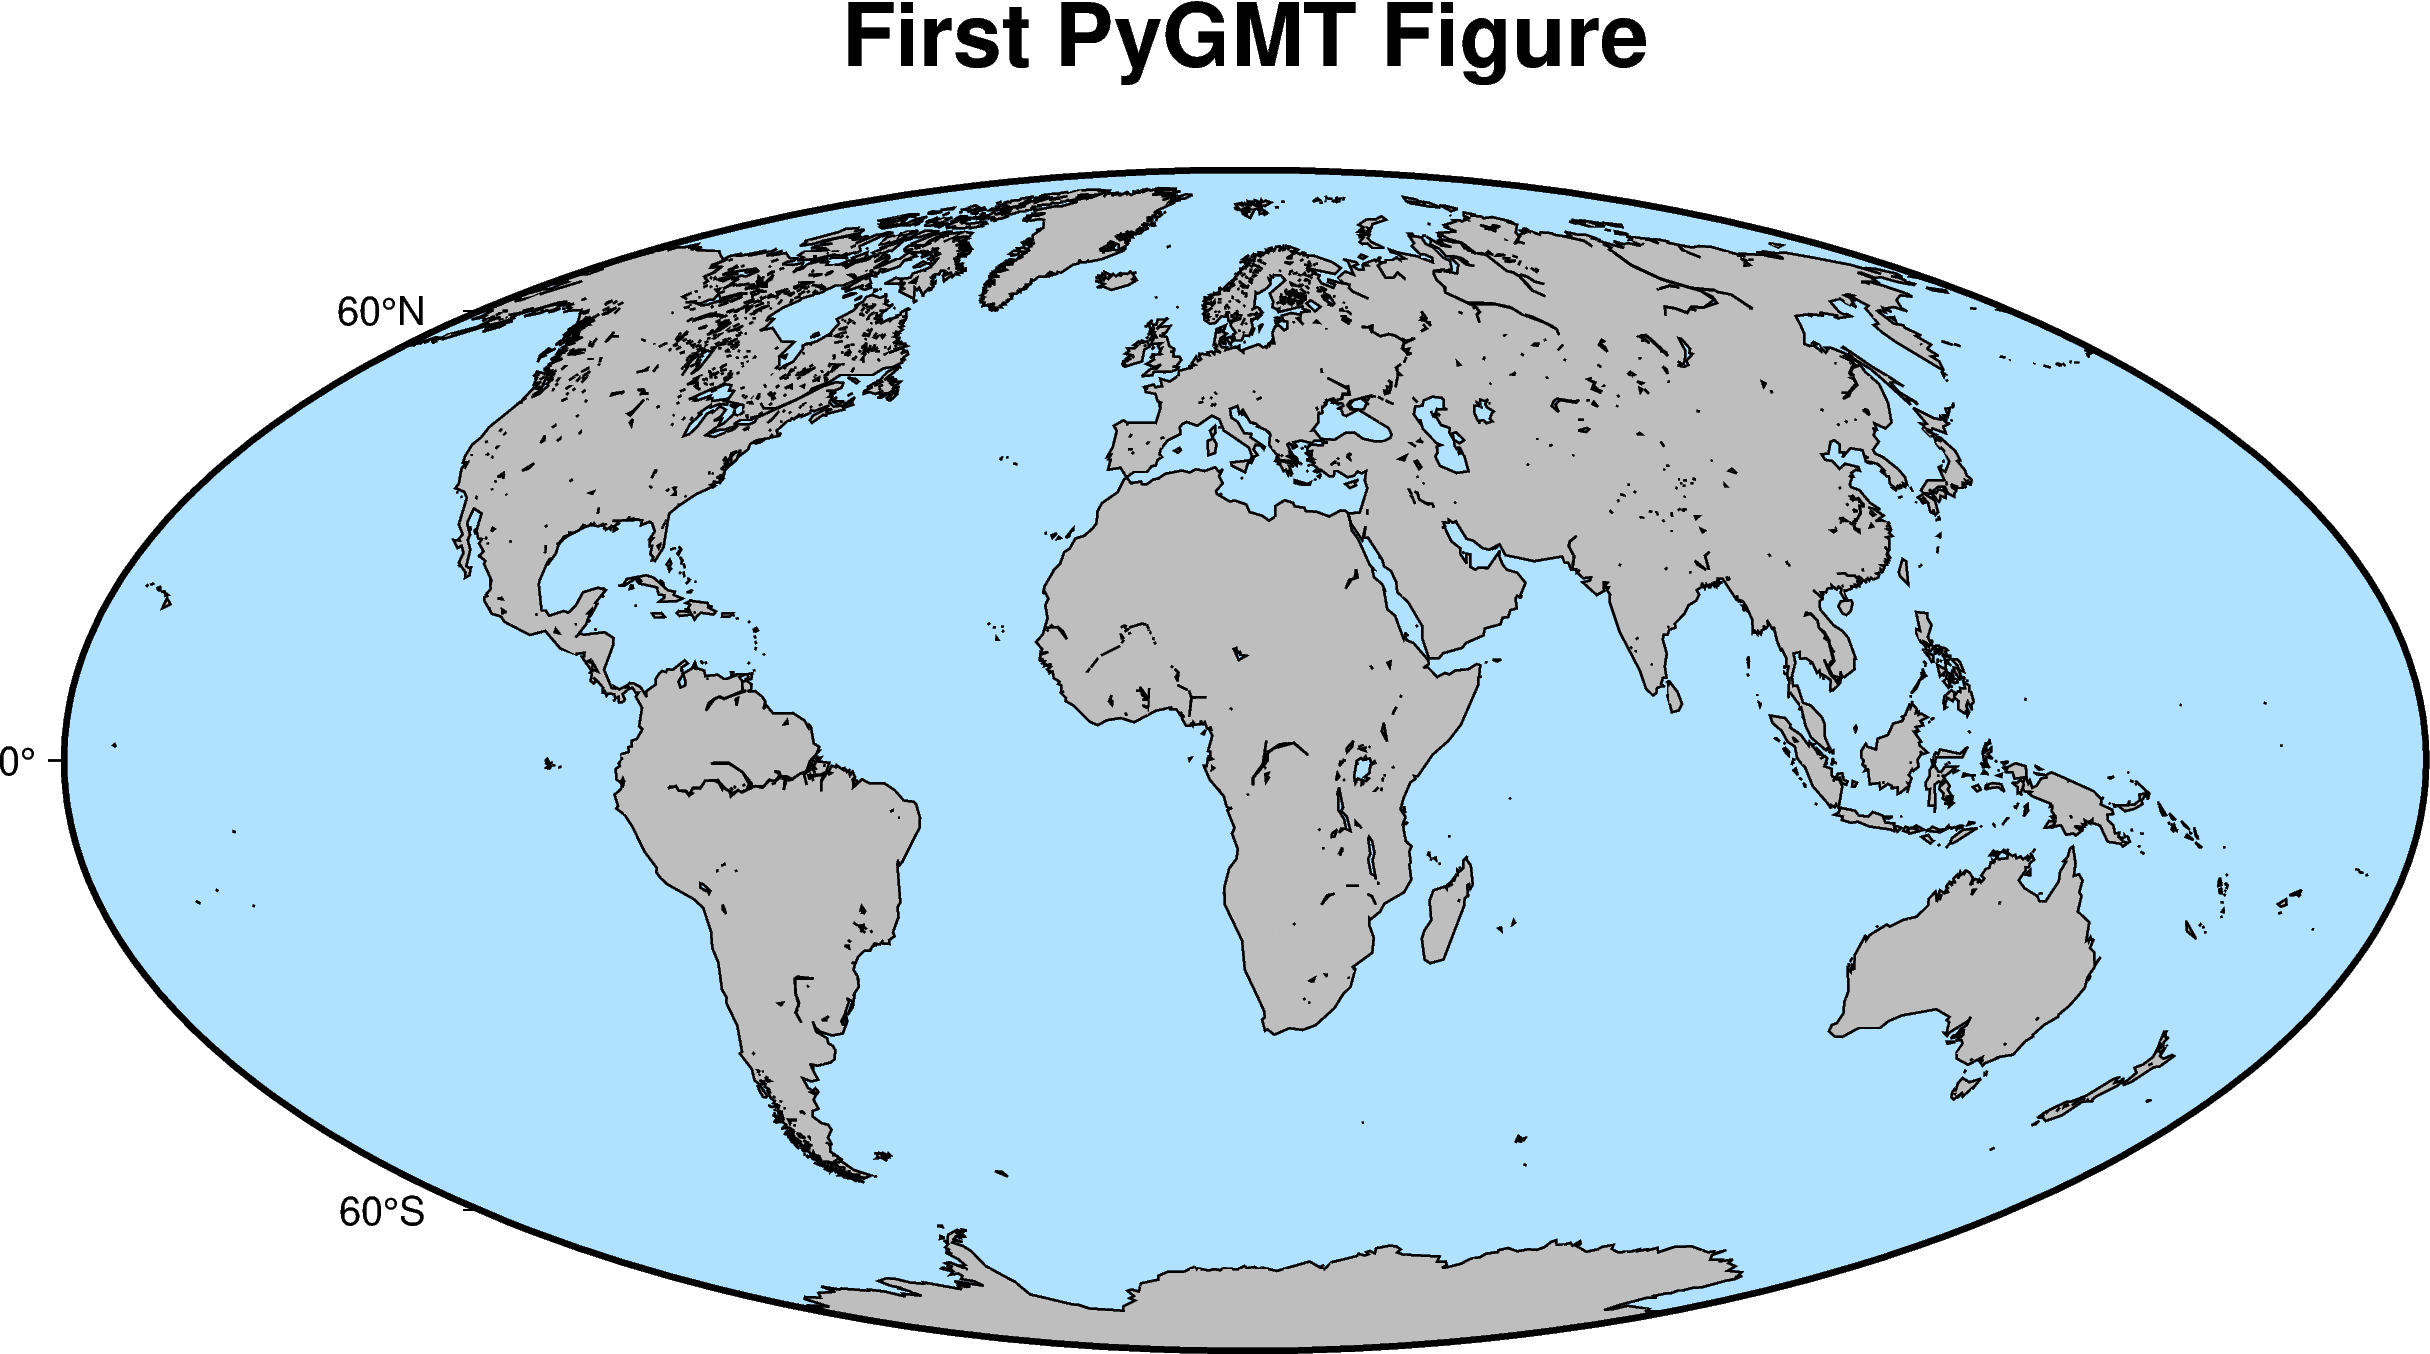

In [4]:
# Start by creating a new figure instance which will be the canvas for plotting.
fig = pygmt.Figure()

# Plot the coastlines and other geographical features onto the figure.
# We'll use the `coast` method which draws coastlines, filled continents, and political boundaries on maps.
fig.coast(
    # Define the projection of the map. Here, "W15/20c" refers to the Mollweide projection
    # which is an equal-area projection. Centered at 15 degrees longitude and the map will be 20 cm wide.
    projection="W15/20c",
    #"W" refers to the Mollweide projection, an equal-area pseudocylindrical projection.
    #"15" sets the central meridian of the projection to 15 degrees longitude.
    #"20c" specifies the width of the map to be 20 centimeters.

    # Set the region to be displayed. "d" stands for the whole earth (global domain).
    region = "d",

    # Define the frame of the map. "a" puts annotated tickmarks on the west side of the map,
    # and "+tFirst PyGMT Figure" adds the title "First PyGMT Figure" to the top of the map.
    frame=["a","+tFirst PyGMT Figure"],

    # Set the color of the land areas to "gray".
    land="gray",

    # Set the color of the water bodies to "lightskyblue1".
    water="lightskyblue1",

    # Define the appearance of shorelines. "0.5p,black" means they'll be drawn with a 0.5 point width and black color.
    shorelines="0.5p,black"
)

# Display the created figure.
fig.show()


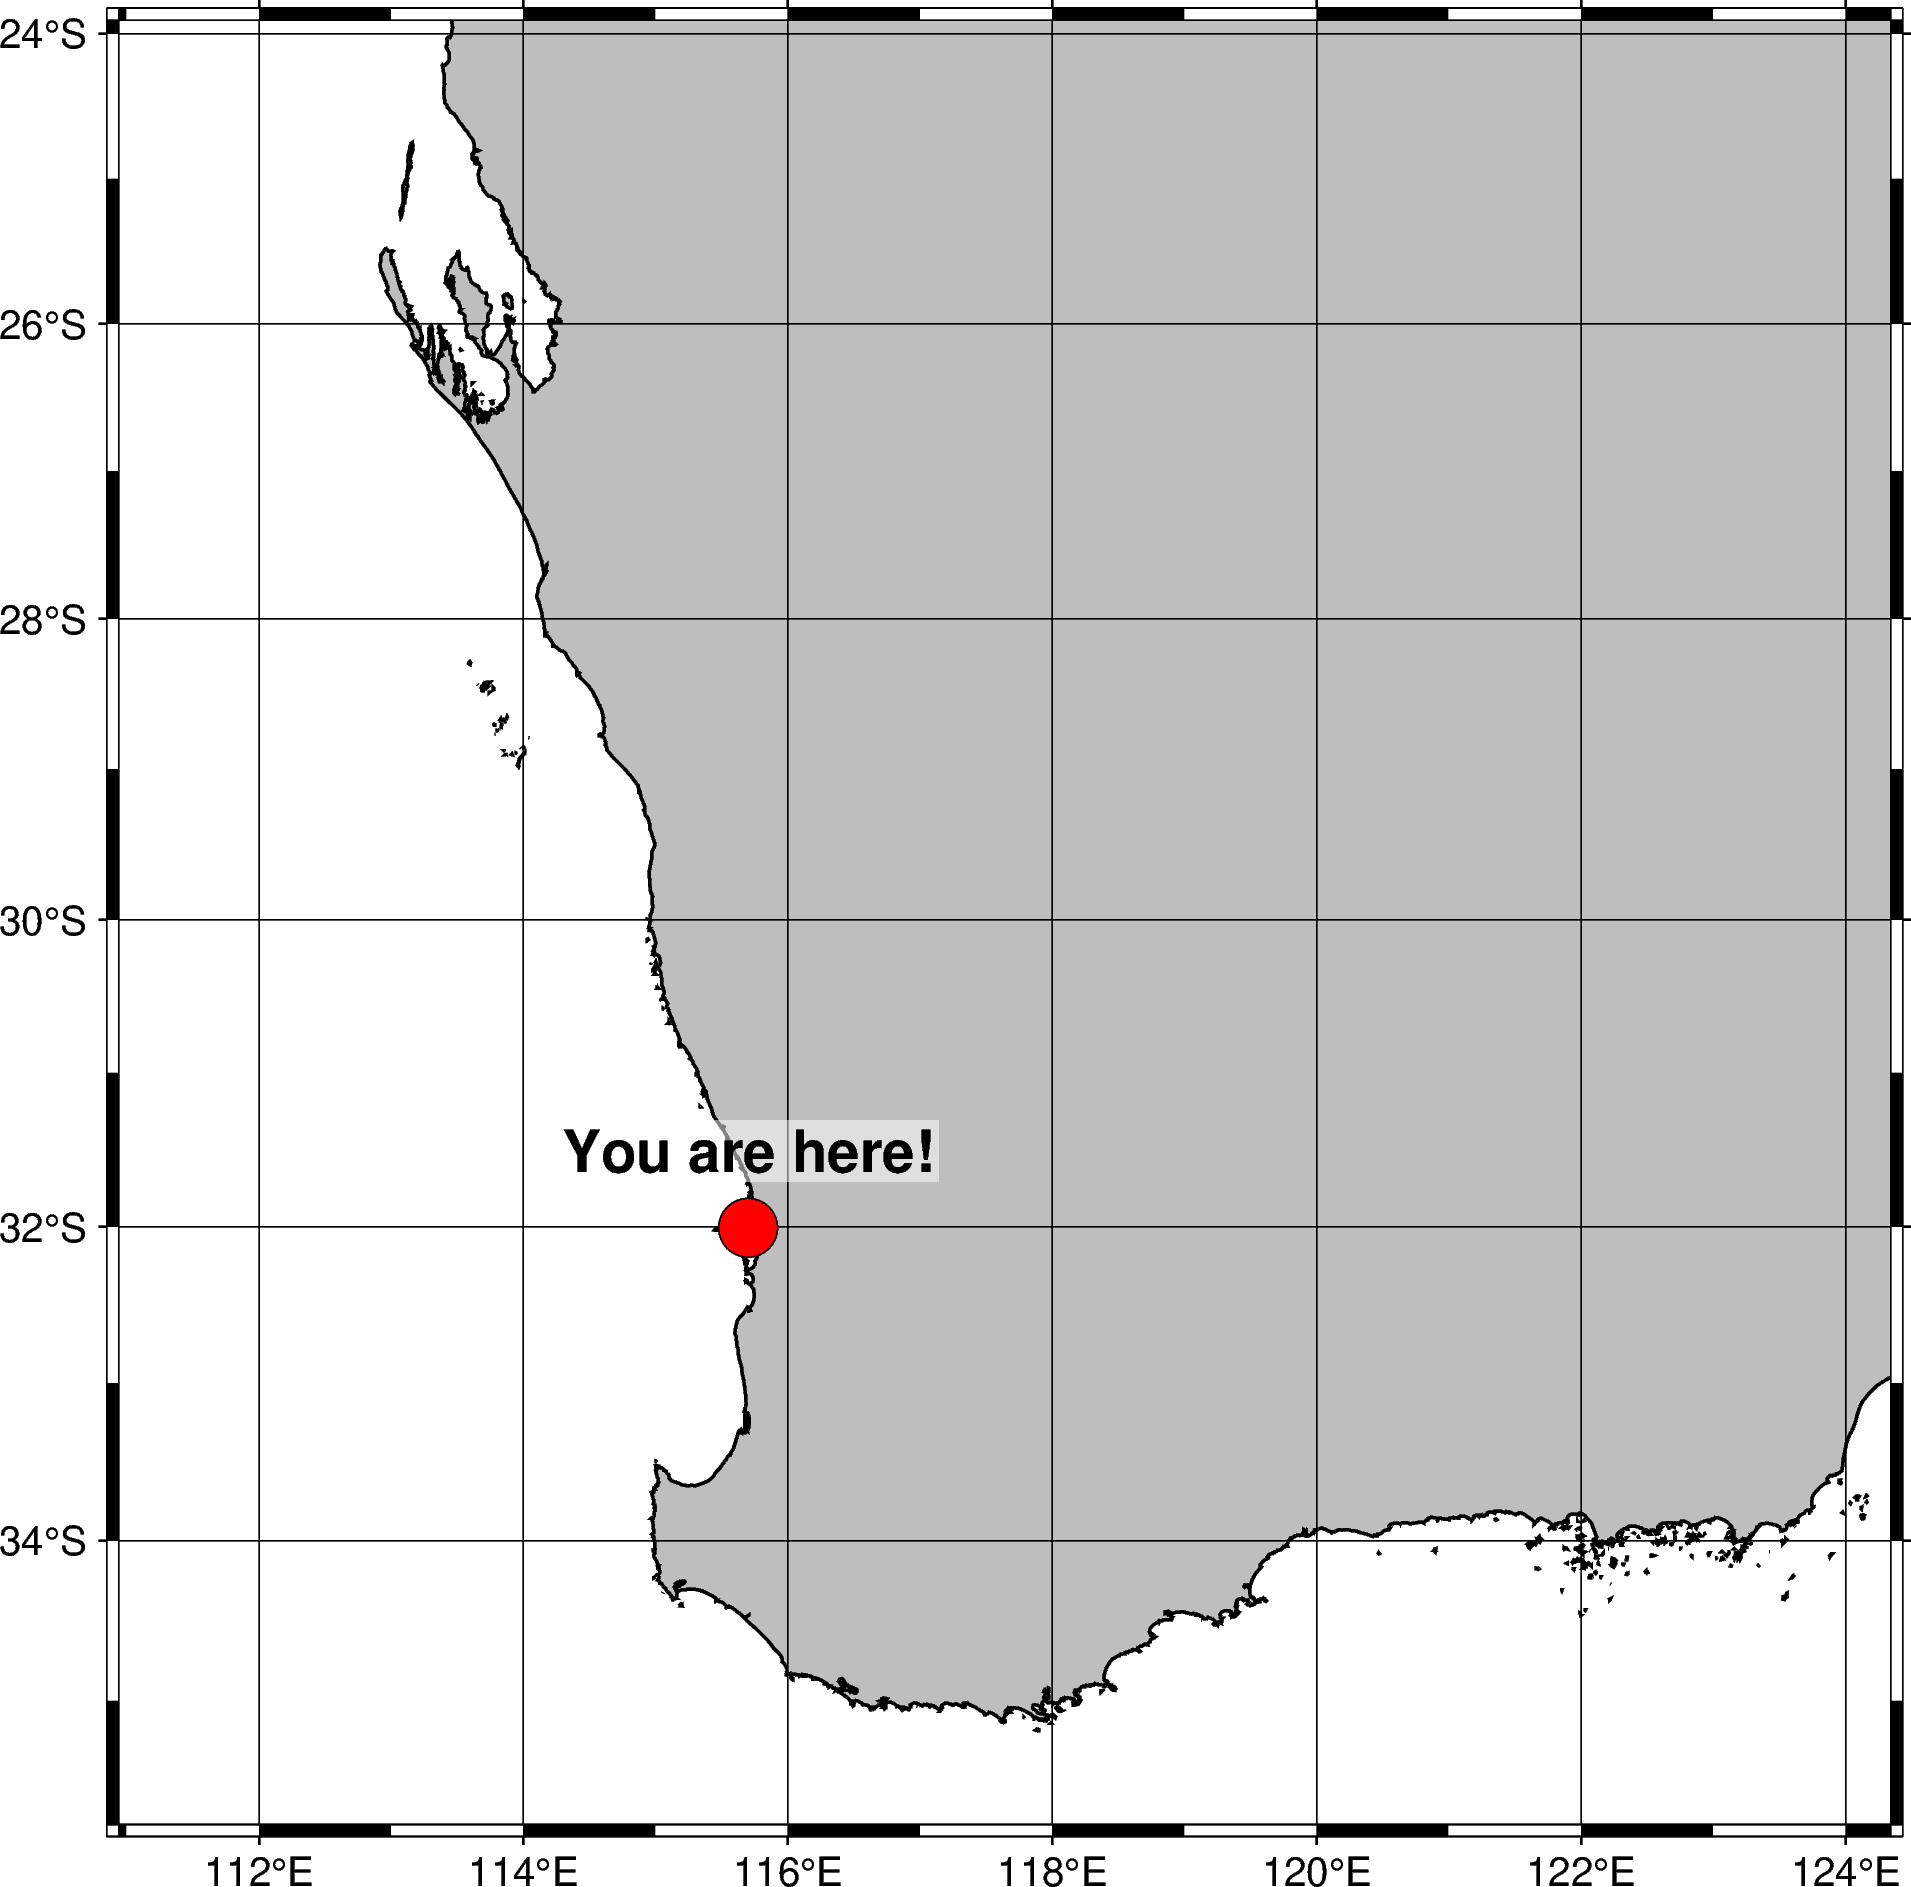

In [12]:
fig = pygmt.Figure()

fig.coast(
    projection="M15c",
    region=[110.94, 124.34, -35.77, -23.908],
    land="Gray",
    borders=["1/1p,black","2/thinnest,black"], #level 1: countrylevel; level 2: state level
    shorelines='thin,black',
    frame='afg'
  )

Perth_Coords = [115.7,-32.00681]

# We can use fig.plot to plot points or lines
fig.plot(
    x=Perth_Coords[0],
    y=Perth_Coords[1],
    style="c0.5c", # circles with 0.3 centimetres in diameter
    fill="red", # fill color of the circle
    pen="thinnest,black" # color of the outline
)

fig.text(
    text="You are here!",
    x=Perth_Coords[0],
    y=Perth_Coords[1]+0.5, # offset for the text
    fill='white@50', # Background
    font="14p,Helvetica-Bold,black"
)

fig.show()

### We can use country ISO codes to plot maps of specific countries

In [ ]:
fig = pygmt.Figure()

fig.coast(
    projection="M15c",
    region="MG",
    land="Gray",
    borders=["1/1p,black","2/thinnest,black"], #level 1: countrylevel; level 2: state level
    shorelines='thin,black',
    frame='afg'
  )

fig.show()

The fig pygmt.Figure() object maintains its properties and any change done to it in the following cells, as long as we don't overwrite the name "fig".

PyGMT has heaps of named colours and colourmaps, but you can also specify using RGB values.
https://docs.generic-mapping-tools.org/dev/_images/GMT_RGBchart.png
https://docs.generic-mapping-tools.org/6.2/cookbook/cpts.html



Let's add the Mid-Ocean ridge samples to the figure:

In [ ]:
MORB = pd.read_csv(r"https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/main/StrackeCompilation2022_MORB.csv",encoding='cp1252')
#create a dataframe called Plume by reading csv file"
Plume = pd.read_csv(r"https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/main/AMD_OIBs_Workshop.csv",encoding='cp1252')
# read shp file from shp file#
#LIPs = gpd.read_file('/content/drive/MyDrive/PythonWorkshop/SHP/Whittaker_etal_2015_LIPs.shp')
LIPs = gpd.read_file(r"https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/main/Whittaker_etal_2015_LIPs.shp")


In [ ]:
# renaming columns 'Lat' and 'Lon' to 'LATITUDE' and 'LONGITUDE' respectively in the Plume dataframe
Plume = Plume.rename({"Lat":"LATITUDE","Lon":"LONGITUDE"},axis=1)

# calculating the 'eNd' value for the MORB dataframe using the formula and storing it in a new column 'eNd'
MORB["eNd"] = MORB["iso143Nd144Nd"].apply(lambda x: ((x/0.51263)-1)*1e4)

# calculating the 'eNd' value for the Plume dataframe using the formula and storing it in a new column 'eNd'
Plume["eNd"] = Plume["143Nd"].apply(lambda x: ((x/0.51263)-1)*1e4)



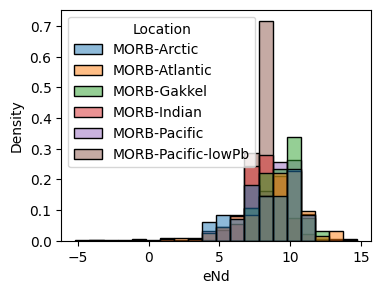

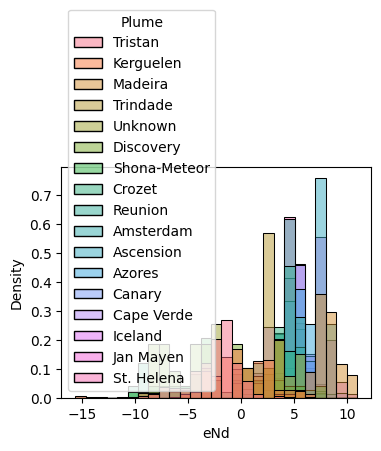

In [ ]:
# Create the first figure for MORB data
plt.figure(figsize=(4, 3))
sns.histplot(
    data=MORB,              # Data source
    x="eNd",                # Column for the x-axis
    stat="density",         # Display density instead of counts
    hue="Location",         # Color-code based on the "Location" column
    common_norm=False,      # Do not normalize hue groups to the same area
    binwidth=1              # Width of the histogram bins
)

# Adjust the legend position for the first figure
plt.show()  # Display the first figure

# Create the second figure for Plume data
plt.figure(figsize=(4, 3))
sns.histplot(
    data=Plume,             # Data source
    x="eNd",                # Column for the x-axis
    stat="density",         # Display density instead of counts
    hue="Plume",            # Color-code based on the "Plume" column
    common_norm=False,      # Do not normalize hue groups to the same area
    binwidth=1              # Width of the histogram bins
)

# Adjust the legend position for the second figure
plt.show()  # Display the second figure


In [ ]:
fig = pygmt.Figure()

# Plot the coastlines and other geographical features onto the figure.
# We'll use the `coast` method which draws coastlines, filled continents, and political boundaries on maps.
fig.coast(
    # Define the projection of the map. Here, "W15/20c" refers to the Mollweide projection
    # which is an equal-area projection. Centered at 15 degrees longitude and the map will be 20 cm wide.
    projection="W15/20c",
    #"W" refers to the Mollweide projection, an equal-area pseudocylindrical projection.
    #"15" sets the central meridian of the projection to 15 degrees longitude.
    #"20c" specifies the width of the map to be 20 centimeters.

    # Set the region to be displayed. "d" stands for the whole earth (global domain).
    region = "d",

    # Define the frame of the map. "a" puts annotated tickmarks on the west side of the map,
    # and "+tFirst PyGMT Figure" adds the title "First PyGMT Figure" to the top of the map.
    frame=["a","+tFirst PyGMT Figure"],

    # Set the color of the land areas to "gray".
    land="gray",

    # Set the color of the water bodies to "lightskyblue1".
    water="lightskyblue1",

    # Define the appearance of shorelines. "0.5p,black" means they'll be drawn with a 0.5 point width and black color.
    shorelines="0.5p,black"
)


# Use the `plot` method to add points to the figure `fig`.
fig.plot(
    # Define the x-coordinates of the points using the "LONGITUDE" column of the MORB dataframe.
    x=MORB["LONGITUDE"],

    # Define the y-coordinates of the points using the "LATITUDE" column of the MORB dataframe.
    y=MORB["LATITUDE"],

    # Set the style of the points.
    # "c0.3c" specifies that the points will be represented as circles with a diameter of 0.3 centimeters.
    style="c0.3c"
    # - "c" denotes that the symbol used for plotting will be a circle.
    # - "0.3" is the size of the circle.
    # - The second "c" indicates that the size is given in centimeters.
)

# Display the figure with the plotted points.
fig.show()


Now let's add some color

In [ ]:
# Create a custom color palette using the `makecpt` function.
# This color palette will be used for the fill colors of the plotted points based on the "eNd" values in MORB dataframe.
pygmt.makecpt(
    # "viridis" is a colormap which ranges from yellow to green to blue.
    cmap="viridis",
    # Define the range for the color palette to span from the minimum to the maximum "eNd" value in the MORB dataframe.
    # Colors will be binned in intervals of size 2.
    series=[MORB["eNd"].min(), MORB["eNd"].max(), 2]
)

# Plot the data points on the `fig` using the `plot` method.
fig.plot(
    # Define the x-coordinates of the points using the "LONGITUDE" column of the MORB dataframe.
    x=MORB["LONGITUDE"],
    # Define the y-coordinates of the points using the "LATITUDE" column of the MORB dataframe.
    y=MORB["LATITUDE"],
    # Specify the symbol and size for plotting.
    # "c0.3c" denotes that points will be plotted as circles with a diameter of 0.3 centimeters.
    style="c0.3c",
    # The fill colors of the points will be based on the "eNd" values using the previously defined color palette.
    fill=MORB["eNd"],
    # Use the custom colormap created earlier for the fill colors.
    cmap=True,
    # Outline the circles with the thinnest possible line width.
    pen="thinnest"
)

# Add a colorbar to the figure to represent the range of "eNd" values and their corresponding colors.
# This provides context to the colors used for plotting the points.
fig.colorbar(
    # Define the annotations, format, and label for the colorbar.
    # "af" automatically determines the interval of annotations.
    # "+l@~e@~@-Nd@" sets the label of the colorbar with the text "e-Nd", where "@~e@~" represents the symbol for "epsilon".
    frame="af+l@~e@~@-Nd@"
)

# Display the figure with the plotted points and the colorbar.
fig.show()


## Let's focus on the Atlantic Ocean

Mollweide projection is suitable for global maps; we need to change the projection. PyGMT offers many different projections. https://www.pygmt.org/latest/projections/index.html

For the Atlantic Ocean we need a projection suitable for large regions with a dominant N-S extent.


In [ ]:
# Set the geographical extent for the figure to cover.
# This region corresponds approximately to the Atlantic Ocean.
region = [-82.7,10,-52,80]
#region = [west, south, east, north]
# - west (westernmost longitude)
# - south(southernmost latitude)
# - east (easternmost longitude)
# - north (northernmost latitude)

# Choose the Cassini Cylindrical projection for the map.
# Centered at longitude -30 and the map will be 20 cm wide.
proj = "C-30/0/20c"

# Create a new PyGMT figure instance.
fig = pygmt.Figure()

# Load a dataset containing earth relief (topography/bathymetry) data for the specified region.
# The data will have a resolution of 6 minutes.
relief = pygmt.datasets.load_earth_relief(resolution="06m", region=region)

# Create a color palette (colormap) suitable for representing bathymetry (underwater topography).
pygmt.makecpt(cmap="bathy", series=[-8000, 0])

# Add a background image to the figure using the relief data and the bathymetry color palette.
fig.grdimage(
    relief,
    cmap=True,
    region=region,
    projection=proj,
    frame=['xa15+15f', 'ya30g30f', "+tAtlantic Ocean"] # Axis annotations and title for the figure.
)

# Overlay coastlines and political boundaries onto the figure.
# The land areas will be colored gray and shorelines will be drawn using a thin line.
fig.coast(
    land="gray",
    shorelines="thin",
)

# Plot the Large Igneous Provinces (LIPs) that are associated with mid-ocean ridges (MOR).
fig.plot(
    LIPs.loc[LIPs.PBType == "MOR"],
    pen="1p,red" # Use a red color with a line width of 1 point.
)

# Create a color palette for representing the "eNd" values in the MORB dataset.
pygmt.makecpt(cmap="inferno", series=[MORB["eNd"].min(), MORB["eNd"].max(), 2])

# Plot the MORB data points.
fig.plot(
    x=MORB["LONGITUDE"],
    y=MORB["LATITUDE"],
    style="c0.3c", # Plot as circles of diameter 0.3 cm.
    fill=MORB["eNd"], # Fill color based on "eNd" values.
    cmap=True,
    pen="thinnest" # Use the thinnest line width for the outline.
)

# Plot the OIB (Ocean Island Basalts) data points from the Plume dataset.
fig.plot(
    x=Plume["LONGITUDE"],
    y=Plume["LATITUDE"],
    style="t0.3c", # Plot as triangles of size 0.3 cm.
    fill=Plume["eNd"], # Fill color based on "eNd" values.
    cmap=True,
    pen="thinnest" # Use the thinnest line width for the outline.
)

# Add a colorbar to the figure to show the range of "eNd" values and their corresponding colors.
fig.colorbar(frame="af+l@~e@~@-Nd@")
## alternatively now you can paste non-latin symbols such as ε as well

# Display the created figure.
fig.show()


We can use pygmt.blockmean() function to compute spatial statistics. In the following example we will use this function to compute and visualize the variation of the mean $\epsilon_{Nd}$ value per 1-degree bin

In [ ]:
# Extract relevant columns from the MORB dataframe for processing.
data = MORB[["LONGITUDE", "LATITUDE", "eNd"]]

# Define the spacing for grid creation. Here, "01d" means a spacing of 1 degree.
spacing = "01d"

# Use blockmean to reduce data density, returning mean values within non-overlapping bins.
# This is often useful before gridding large datasets to avoid aliasing artifacts.
df = pygmt.blockmean(data=data, region=region, spacing=spacing)

# Convert the binned data (from blockmean) into a grid format.
grd = pygmt.xyz2grd(data=df, region=region, spacing=spacing)

# Create a new PyGMT figure instance.
fig = pygmt.Figure()

# Define a color palette using the inferno colormap, based on the range of eNd values in the MORB dataset.
pygmt.makecpt(cmap="inferno", series=[MORB["eNd"].min(), MORB["eNd"].max(), 2], background=False)

# Add a grid image to the figure using the grd data.
fig.grdimage(
    grid=grd,
    region=region,
    projection=proj,
    cmap=True,
    frame=['xa15+15f', 'ya30g30f', "+tAtlantic Ocean"]
    # 'xa15+15f': Annotate the x-axis every 15 degrees and add minor tick marks every 15 degrees.
    # 'ya30g30f': Annotate the y-axis every 30 degrees and add grid lines every 30 degrees.
    # '+tAtlantic Ocean': Set the title of the plot to "Atlantic Ocean".
)

# Overlay coastlines onto the figure.
# The land areas will be colored gray and shorelines will be drawn using a thin line.
fig.coast(
    land="gray",
    shorelines="thin"
)

# Add a colorbar to the figure to explain the colormap.
fig.colorbar(frame="af+l@~e@~@-Nd@")
# 'a': Automatic annotation interval.
# 'f': Add minor tick marks based on the automatic annotation interval.
# 'l@~e@~@-Nd@': Label the colorbar with "eNd". '@~' symbols allow for the use of special characters, transforming the e into epsilon.

# Shift the origin for subsequent plotting (useful for multi-plot figures).
fig.shift_origin(yshift="-15c", xshift="3c")

# Plot Latitude vs eNd for locations containing the word "Atlantic".
fig.plot(
    region=[-65, 65, -6, 15],
    projection="X15c/10c",
    # 'X': Linear projection.
    # '15c': Width of the plot will be 15 centimeters.
    # '/10c': Height of the plot will be 10 centimeters.
    x=MORB.loc[MORB.Location.str.contains("Atlantic")].LATITUDE,
    y=MORB.loc[MORB.Location.str.contains("Atlantic")].eNd,
    style="c0.3c", # Plot as circles of diameter 0.3 cm.
    fill="blue",
    frame=["xa20+lLatitude", "ya2+leNd", "WSne"]
    # 'xa20+lLatitude': Annotate the x-axis every 20 units and label it as "Latitude".
    # 'ya2+leNd': Annotate the y-axis every 2 units and label it as "eNd".
    # 'WSne': Draw borders on the West, South, North, and East sides of the plot.
)

# Display the figure.
fig.show()


# Geological Maps
PyGMT can also be used to plot geological maps using shapefiles.

In the example below we will load the shapefiles and a csv file with the colors for each geological unit and use it to plot a geological map with a hillshade in the background to give it some texture.

In [ ]:
# First we load the files

Rio_shp = gpd.read_file(r"https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/main/Files/Shapefiles/Rio_lito_clip.shp")
Extent = gpd.read_file(r"https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/main/Files/Shapefiles/Clip_Limit.shp")
Rio_colors = pd.read_csv(
    r"https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/main/Files/Shapefiles/Symb.csv"
)

# Set the region for the extent of the shapefile
region = list(Extent.geometry.total_bounds[[0,2,1,3]])

# Set the projection to UTM zone 23K and a map width of 15cm
proj = "U23K/15c"

# Import the SRTM DEM grid for the area of interest with a resolution of 1 arc-second
grid = pygmt.datasets.load_earth_relief(resolution="01s",region=region)


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 1x1 arc seconds tiles provided by SRTMGL1 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_01s_g): S24W045


In [ ]:
# create a dictionary of units and their respective colours
color_dict = dict(zip(Rio_colors["value"],Rio_colors["color"]))

In [ ]:
fig = pygmt.Figure()

# calculate the hillshade with light coming from 315 degrees azimuth at 45 degrees inclination
dgrid = pygmt.grdgradient(grid=grid,radiance=[315,45])

# make the coloring for the hillshade
pygmt.makecpt(cmap="gray", series=[-1, 1, 0.01])

# plotting the hillshade on the map
fig.grdimage(
    grid=dgrid,
    projection=proj,
    region=region
)


# Do a loop in which each unit in the shapefile will be plotted with its respective colour
# with 50% transparency
for s,c in zip(color_dict.keys(),color_dict.values()):
    fig.plot(
        Rio_shp.loc[Rio_shp["SIGLA_UNID"]==s], # at each step of the loop only plot one unit
        fill=c[:-4], # the colour is in R/G/B/alpha formation - with the [:-4] we're just ignoring the alpha
        pen="thinnest,black",
        transparency=50
    )


# Making the ocean blue
fig.coast(
    region=region,
    projection=proj,
    water="lightskyblue1",
)

# grid, title, scalebar, north rose
fig.basemap(
    frame=['xa0.5g0.5f', 'ya0.5g0.5f',"+tRio de Janeiro Geological Map"],
    map_scale="jBL+w20k+o0.5c/0.5c+f+l",
    rose = "jBR+w2c+l"
)


fig.show()


Output hidden; open in https://colab.research.google.com to view.

# 3D plots

In this section we will explore how to create 3D visualizations from gridded data, in this case a digital elevation model. We will also display dredge data from [Homrighausen et al. (2023)](https://www.nature.com/articles/s41467-023-39585-0) in the Rio Grande Rise area.

In [2]:
df = pd.read_excel(r"https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/main/Files/RioGrandeRise.xlsx",sheet_name="Data")

# Select samples from the Cruzeiro do Sul Rift
CdSR = df.loc[df.location.str.contains("Cruzeiro")] # Here we are filtering by which rows contain the word "Cruzeiro" in the "location" column

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 at 30x30 arc seconds reduced by Gaussian Cartesian filtering (2.6 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 15x15 degree grid tile (earth_relief_30s_g): S45W045


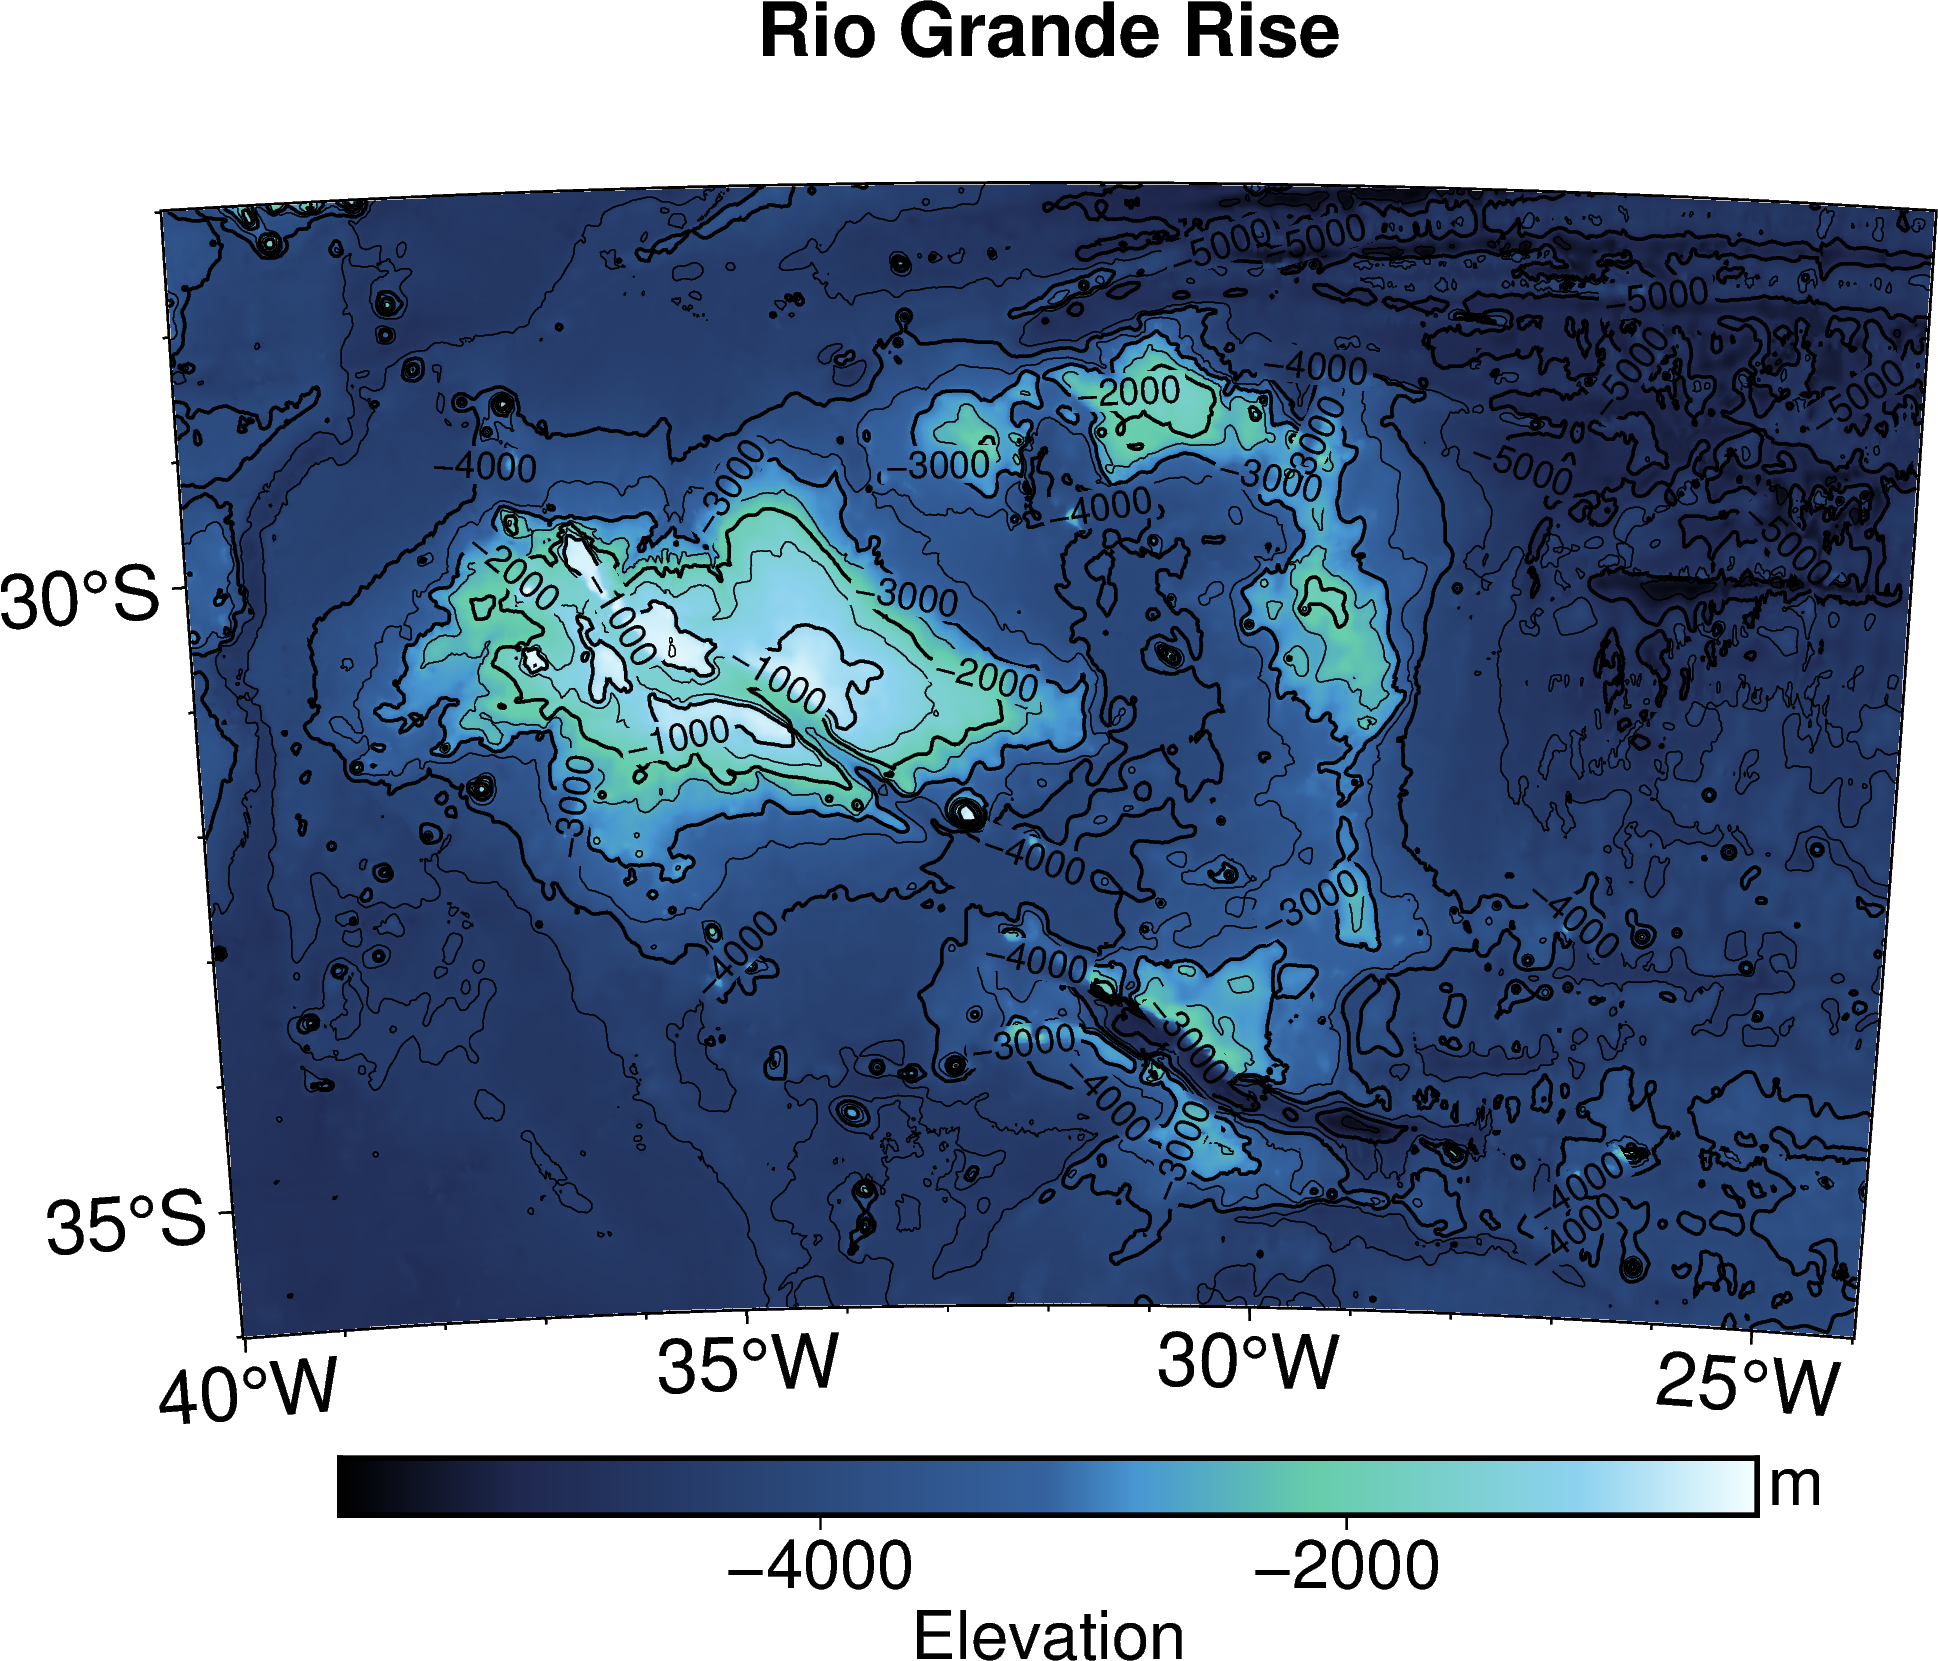

In [3]:
proj = "C-32/-30/15c"
# 'C' stands for the Cassini Cylindrical projection.
# '-32' is the central meridian (longitude) of the projection.
# '-30' is the standard parallel (latitude) where the scale is true.
# '15c' means the map will have a diameter of 15 centimeters.

region = [-40,-24,-36,-27]
# Bounds of our map


# Load a dataset containing earth relief (topography/bathymetry) data for the specified region.
# The dataset will have a resolution of 30 arc seconds.
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)

# Instantiate a new PyGMT Figure.
fig = pygmt.Figure()

# Set global configurations for the figure.
# FORMAT_GEO_MAP: Format of the annotations on the map. "dddF" means degrees with a fractional part.
# MAP_FRAME_TYPE: Display the frame as plain without fancy embellishments.
# FONT: Set the font size for annotations to 18 points.
pygmt.config(FORMAT_GEO_MAP="dddF", MAP_FRAME_TYPE="plain", FONT='18p')

# Construct the base of the map.
# The projection used is Azimuthal Equidistant with a central meridian at 180 degrees, and a standard parallel at 90 degrees.
# The map will be 12 cm in diameter.
# Define the frame settings for annotations and title.
fig.basemap(
    region=region,
    projection=proj,
    frame=['xa5g5f', 'ya5g5f', '+t"Rio Grande Rise"'] # Annotate the axes every 5 degrees, use grid lines every 5 degrees, and set the title.
    # 'xa5g5f':
    # This specifies settings for the x-axis (usually the longitude in geographic maps).
    # 'x' stands for the x-axis.
    # 'a5' means to annotate every 5 units.
    # 'g5' means to place grid lines every 5 units.
    # 'f' indicates that the annotations should be written with a fractional part.

    # 'ya5g5f':
    # Similarly, this specifies settings for the y-axis (usually the latitude in geographic maps).
    # 'y' stands for the y-axis.
    # 'a5' means to annotate every 5 units.
    # 'g5' means to place grid lines every 5 units.
    # 'f' indicates that the annotations should be written with a fractional part.

    # '+t"Rio Grande Rise"':
    # This sets the title of the plot to "Rio Grande Rise".

)

# Display the grid data on the figure with the bathy colormap.
fig.grdimage(grid=grid, region=region, cmap="bathy")

fig.grdcontour(grid=grid,interval=500,annotation=1000)


# Add a colorbar to the figure to show the elevation.
# Define the annotation intervals for the colorbar and label the x and y axes.
fig.colorbar(frame=["a2000", "x+lElevation", "y+lm"])
# 'a2000':
# This specifies the interval for the primary annotations on the colorbar.
# 'a' stands for automatic annotation interval.
# '2000' means to place annotations at every 2000 units (e.g., meters or feet depending on the context).

# 'x+lElevation':
# This specifies settings for the x-axis of the colorbar.
# 'x' refers to the x-axis.
# '+lElevation' means to add a label to the x-axis with the text "Elevation".

# 'y+lm':
# This specifies settings for the y-axis of the colorbar.
# 'y' refers to the y-axis.
# '+lm' means to add a label with the unit in meters to the y-axis.

# Display the created figure.
fig.show()


In [4]:
fig = pygmt.Figure()



Bathy = pygmt.makecpt(cmap='bathy',series=f'-6000/0/100',continuous=True)
frame =  ["xa5f1","ya5f1", "wSEnz"]

# Estimate depth of the location of the DSDP hole in the dataset based on the bathymetry grid
df.loc[df.location.str.contains("DSDP"),"Dredge depth (mbsl)"] = grid.sel(lon=-35.285,lat=-30.2765,method="nearest").values



with pygmt.config(FONT='22p',FORMAT_GEO_MAP="dddF", MAP_FRAME_TYPE="fancy"):
    fig.grdview(grid=grid,
                region=region+[-6000,0],
                frame=['xa5g5f', 'ya5g5f', "wSEnz"],
                perspective=[135,45], # set the perspective here
                projection=proj, # set the projection
                zsize='2c', # set the vertical scale
                surftype='s',
                cmap=Bathy,
                xshift='15c',
                plane="-5500+ggrey", # set the plane of the map
                shading='+a20+nt1') # caution with the shading
    fig.basemap(
        perspective=True,
        rose="JCL+w5c+l+o1c/0c" # map directional rose at the center (MAP) left with a little shift
    )

    # make a new cpt for the variation in eNd of the CdSR samples
    pygmt.makecpt(cmap="plasma",series=[CdSR.eNd.min(),CdSR.eNd.max(),0.2])
    fig.plot3d(
        x=CdSR.Longitude,
        y=CdSR.Latitude,
        z=-CdSR["Dredge depth (mbsl)"], # snap the points to their depth
        style="c0.5c",
        fill=CdSR.eNd,
        cmap=True,
        pen="thinnest,black",
        perspective=True
    )

    # Plot the location of DSDP site 516
    fig.plot3d(
        x=df.loc[df.location.str.contains("DSDP"),"Longitude"],
        y=df.loc[df.location.str.contains("DSDP"),"Latitude"],
        z=df.loc[df.location.str.contains("DSDP"),"Dredge depth (mbsl)"],
        style="t1.0c",
        fill="green",
        pen="thinnest,black",
        perspective=True
    )

    # Annotating the DSDP site 516 location
    fig.text(
        justify="BC",
        x=-36,
        y=-28.2,
        text="DSDP site 516",
        font="16p,black",
        fill="white@20",
        perspective=True
    )

    # Plot bathymetry and eNd colorbars
    fig.colorbar(frame=["a2.0", "x+l@~e@~@-Nd@"],position='JMR+o10/0+w10c')
    fig.colorbar(cmap="bathy",frame=["a1000", "x+lDepth"],position='JMR+o13/0+w10c',scale=3/4)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# @title Darling Escarpment

fig = pygmt.Figure()

region = [115.28,116.60,-32.56,-31.56]
proj = "C115/-32/15c"

grid = pygmt.datasets.load_earth_relief(resolution="03s", region=region)

cpt = pygmt.makecpt(cmap='etopo1',series = [-200,200,10], continuous=True)




with pygmt.config(FONT='22p',FORMAT_GEO_MAP="dddF", MAP_FRAME_TYPE="fancy"):
    fig.grdview(grid=grid,
                region=region+[-200,200],
                frame="af",
                perspective=[215,45], # set the perspective here
                projection=proj, # set the projection
                zsize='1c', # set the vertical scale
                surftype='s',
                cmap="etopo1",
                xshift='15c',
                plane="-300+ggrey", # set the plane of the map
                shading='+a20+nt1') # caution with the shading
    fig.basemap(
        perspective=True,
        rose="JCL+w5c+l+o1c/0c" # map directional rose at the center (MAP) left with a little shift
    )

fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Create a map of your choosing